In [1]:
import ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from scipy import signal
# import neurokit2 as nk
import random
# %matplotlib inline 
import pyhrv
import ipynb

from ipynb.fs.full.ECG_features import get_ecgfeatures
from ipynb.fs.full.EDA import get_edaindex, get_edafeatures

c:\Users\riche\AppData\Local\Programs\Python\Python39\lib\site-packages\antropy\fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('float64(float64[:], int32)')


In [2]:
class read_data_of_one_subject:
            """Read data from WESAD dataset"""
            def __init__(self, path, subject):
                self.keys = ['label', 'subject', 'signal']
                self.signal_keys = ['wrist', 'chest']
                self.chest_sensor_keys = ['ACC', 'ECG', 'EDA', 'EMG', 'Resp', 'Temp']
                self.wrist_sensor_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
                #os.chdir(path)
                #os.chdir(subject)
                with open(path + subject +'/'+subject + '.pkl', 'rb') as file:
                    data = pickle.load(file, encoding='latin1')
                self.data = data

            def get_labels(self):
                return self.data[self.keys[0]]

            def get_wrist_data(self):
                """"""
                #label = self.data[self.keys[0]]
                assert subject == self.data[self.keys[1]]
                signal = self.data[self.keys[2]]
                wrist_data = signal[self.signal_keys[0]]
                #wrist_ACC = wrist_data[self.wrist_sensor_keys[0]]
                #wrist_ECG = wrist_data[self.wrist_sensor_keys[1]]
                return wrist_data

            def get_chest_data(self):
                """"""
                signal = self.data[self.keys[2]]
                chest_data = signal[self.signal_keys[1]]
                return chest_data

In [3]:
# Set up empty dataframes for the features
ecgfeatures = pd.DataFrame(None, columns= ['HR_mean', 'HR_min', 'HR_max', 'HR_std', 'SDNN', 'SDANN', 'RMSSD', 'SDSD','pNN50', 'pNN20', 
                                    'abs_power_VLF', 'abs_power_LF', 'abs_power_HF', 'tot_power', 'LF/HF', 
                                    'peak_vlf', 'peak_lf', 'peak_hf', 'norm_power_LF', 'norm_power_HF'])
edafeatures = None

fs = 700
y = []
# data_set_path= "C:/Users/JackC/Documents/EPO4/WESAD/WESAD/" # Folder path
data_set_path= "C:/Users/riche/Downloads/WESAD/WESAD/" # Folder path

for i in range(16): # 15 subject
    subject = 'S'+str(i+2) # Cycle through S2 to S17
    print(subject)
    if subject != 'S12': # Skip S12, because it does not exist
        # Object instantiation
        obj_data = {}

        # Accessing class attributes and method through objects
        obj_data[subject] = read_data_of_one_subject(data_set_path, subject)

        chest_data_dict = obj_data[subject].get_chest_data()
        chest_dict_length = {key: len(value) for key, value in chest_data_dict.items()}

        # Get labels
        labels = obj_data[subject].get_labels()

        for label in range(1,5): # for every state of stress
            
            baseline = np.asarray([idx for idx,val in enumerate(labels) if val == label])

            eda_base=chest_data_dict['EDA'][baseline,0] # Select the EDA data
            ecg_base=chest_data_dict['ECG'][baseline,0] # Select the ECG data
            resp_base=chest_data_dict['Resp'][baseline,0] # Select the respiration data

            tonic, phasic, start, end = get_edaindex(eda_base, fs)

            #Matching the index of the phasic to the other signals
            ecg = ecg_base[start: end]
            resp = resp_base[start: end]
            tonic = tonic[start: end]

            # Multiple (5) samples per signal
            # for j in range(5):

            #     # adding the labels to y
            #     if label==3 or label==4:
            #         y.append(1)
            #     else:
            #         y.append(label)

            #     # choosing a random begin point
            #     begin = random.randint(0, min(len(ecg),len(tonic),len(phasic))- 35000)

            #     # looking at a smaller section of the signal
            #     sample_ecg = ecg[begin: begin + 50 * fs]
            #     sample_tonic = tonic[begin: begin + 50 * fs]
            #     sample_phasic = phasic[begin: begin + 50 * fs]

            #     # getting the eda and ecg features
            #     index = subject + str(label) + str(j)
            #     edafeatures = get_edafeatures(index, edafeatures, phasic, tonic, fs)
            #     ecgfeatures = get_ecgfeatures(ecg, fs, ecgfeatures, index)

            # One sample per signal

            if label==3 or label==4:
                    y.append(1)
            else:
                y.append(label)

            index = subject + str(label) 
            edafeatures = get_edafeatures(index, edafeatures, phasic, tonic, fs)
            ecgfeatures = get_ecgfeatures(ecg, fs, ecgfeatures, index)


            # Plot a signal

            # t=np.arange(0,eda_base.size*(1/fs),(1/fs))
            # t=t[:eda_base.size]
            
            # plt.figure(figsize=(12,4))
            # plt.plot(t, eda_base)
            # plt.xlabel('$Time (s)$') 
            # plt.ylabel('$signal$')


S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17


In [135]:
# Set up empty dataframes for the features
ecgfeatures = pd.DataFrame(None, columns= ['HR_mean', 'HR_min', 'HR_max', 'HR_std', 'SDNN', 'SDANN', 'RMSSD', 'SDSD','pNN50', 'pNN20', 
                                    'abs_power_VLF', 'abs_power_LF', 'abs_power_HF', 'tot_power', 'LF/HF', 
                                    'peak_vlf', 'peak_lf', 'peak_hf', 'norm_power_LF', 'norm_power_HF'])
edafeatures = None

fs = 700
y = []
# data_set_path= "C:/Users/JackC/Documents/EPO4/WESAD/WESAD/" # Folder path
data_set_path= "C:/Users/riche/Downloads/WESAD/WESAD/" # Folder path

for i in range(16): # 15 subject
    subject = 'S'+str(i+2) # Cycle through S2 to S17
    print(subject)
    if subject != 'S12': # Skip S12, because it does not exist
        # Object instantiation
        obj_data = {}

        # Accessing class attributes and method through objects
        obj_data[subject] = read_data_of_one_subject(data_set_path, subject)

        chest_data_dict = obj_data[subject].get_wrist_data()
        chest_dict_length = {key: len(value) for key, value in chest_data_dict.items()}

        # Get labels
        labels = obj_data[subject].get_labels()

        for label in range(1,5): # for every state of stress
            
            baseline = np.asarray([idx for idx,val in enumerate(labels) if val == label])

            eda_base = chest_data_dict['EDA'][baseline,0] # Select the EDA data
            # ecg_base=chest_data_dict['ECG'][baseline,0] # Select the ECG data
            # resp_base=chest_data_dict['Resp'][baseline,0] # Select the respiration data

            tonic, phasic, start, end = get_edaindex(eda_base, fs)

            #Matching the index of the phasic to the other signals
            # ecg = ecg_base[start: end]
            # resp = resp_base[start: end]
            tonic = tonic[start: end]

            # Multiple (5) samples per signal
            # for j in range(5):

            #     # adding the labels to y
            #     if label==3 or label==4:
            #         y.append(1)
            #     else:
            #         y.append(label)

            #     # choosing a random begin point
            #     begin = random.randint(0, min(len(ecg),len(tonic),len(phasic))- 35000)

            #     # looking at a smaller section of the signal
            #     sample_ecg = ecg[begin: begin + 50 * fs]
            #     sample_tonic = tonic[begin: begin + 50 * fs]
            #     sample_phasic = phasic[begin: begin + 50 * fs]

            #     # getting the eda and ecg features
            #     index = subject + str(label) + str(j)
            #     edafeatures = get_edafeatures(index, edafeatures, phasic, tonic, fs)
            #     ecgfeatures = get_ecgfeatures(ecg, fs, ecgfeatures, index)

            # One sample per signal

            if label==3 or label==4:
                    y.append(1)
            else:
                y.append(label)

            index = subject + str(label) 
            edafeatures = get_edafeatures(index, edafeatures, phasic, tonic, fs)


            # Plot a signal

            # t=np.arange(0,eda_base.size*(1/fs),(1/fs))
            # t=t[:eda_base.size]
            
            # plt.figure(figsize=(12,4))
            # plt.plot(t, eda_base)
            # plt.xlabel('$Time (s)$') 
            # plt.ylabel('$signal$')


S2


IndexError: index 214583 is out of bounds for axis 0 with size 24316

In [4]:
# saving the feature data in csv files
edafeatures.to_csv("EDA_features.csv")
ecgfeatures.to_csv("ECG_features.csv")

features = pd.merge(ecgfeatures, edafeatures, left_index=True, right_index=True)
features.to_csv("out_features.csv")

In [ ]:
edafeatures.to_csv("EDA_wrist_features.csv")

In [53]:
total_features = features

In [109]:
eda_chest = edafeatures

In [108]:
features = total_features

In [ ]:
# reading from csv file if necessary
# features = pd.read_csv('out_features.csv', index_col=0)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

# Performing PCA

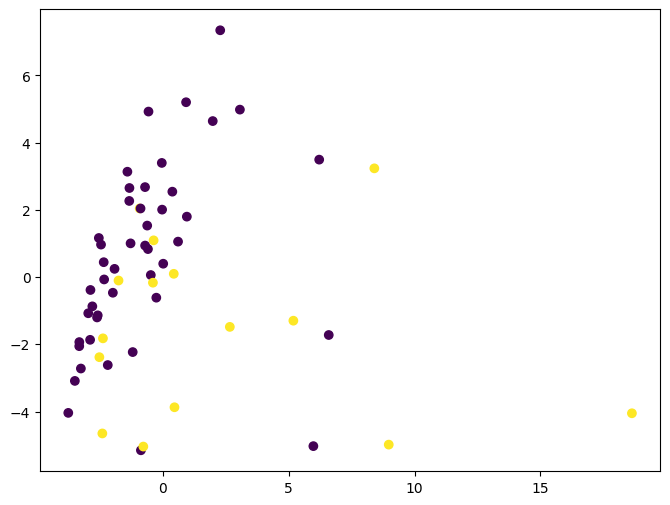

In [110]:
scaler = StandardScaler().fit(features)
X_train = scaler.transform(features)

pca = PCA(n_components=30)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
x_train = X_train_pca[:,0:3] # Three best features

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y)

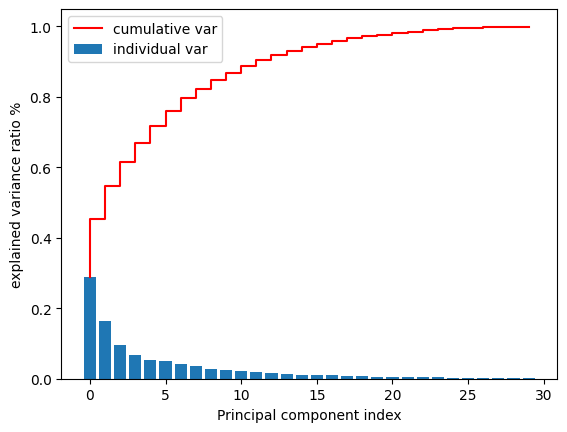

In [111]:
# perform pca on features
plt.bar(range(0,30), pca.explained_variance_ratio_, label="individual var");
plt.step(range(0,30), np.cumsum(pca.explained_variance_ratio_),'r', label="cumulative var");
plt.xlabel('Principal component index'); plt.ylabel('explained variance ratio %');
plt.legend()

In [112]:
# Splitting the data in train and test data
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=5)
# X_train, X_test, y_train, y_test = features[0:57], features[57:], y[0:57], y[57:]
# X_train, X_test, y_train, y_test = features[0:336], features[336:], y[0:336], y[336:]

# Scaling the data

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression

In [113]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
Y_test_pred = logistic_model.predict(X_test)
log_score = logistic_model.score(X_test,y_test)

# SVM

In [114]:
from sklearn import datasets, svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
Y_test_pred = svm_model.predict(X_test)
svm_score = svm_model.score(X_test,y_test)

# Neural Networks

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

val_accuracies = []
for i in range(5): # run 5 times with 5 random states to determine model accuracy
    # Splitting the data in train and test data
    X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state= i + 1)

    # Scaling the data
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    ## Convert labels to categorical
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    # Define the feedforward neural network
    neural_model = Sequential()
    neural_model.add(Dense(64, activation='relu', input_shape=(3,)))
    neural_model.add(Dense(64, activation='relu'))
    neural_model.add(Dense(64, activation='relu'))
    neural_model.add(Dense(64, activation = 'relu'))
    neural_model.add(Dropout(0.5))
    neural_model.add(Dense(3, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    neural_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    # Train the model
    # history = model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=45, batch_size=100, verbose=2)
    history = neural_model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=45, batch_size=100, verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    val_accuracies.append(val_accuracy) # accuracy score

print(val_accuracies)
avg_val_accuracy = sum(val_accuracies) / len(val_accuracies) # average of accurracy scores
print("Average Validation Accuracy:", avg_val_accuracy)

[0.9166666865348816, 0.75, 0.8333333134651184, 0.9166666865348816, 0.9166666865348816]
Average Validation Accuracy: 0.8666666746139526


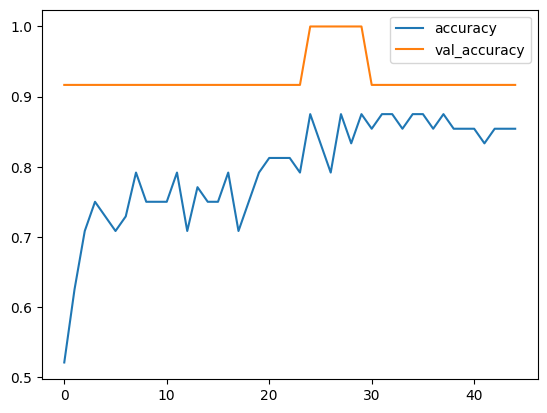

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

# Random forest method

In [126]:
#from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# define the model
randomf_model = RandomForestClassifier()

# fit/train the model on all features
randomf_model.fit(X_train, y_train)
Y_test_pred = randomf_model.predict(X_test)

#score
rf_score=randomf_model.score(X_test, y_test)

# get feature importance
importance = randomf_model.feature_importances_

#creat a dictionary with key=indices, and values=importance
important_features_dict = {}
for idx, val in enumerate(importance):
    important_features_dict[idx] = val
# sorting 
important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
# print indices of top 5 features
print(important_features_list[:5])
#plt.plot(importance)

[2, 1, 0]


# Scores

In [127]:
y_test_cat = to_categorical(y_test)
y_test1 = y_test_cat.astype('int64')
testYarg = np.argmax(y_test1, axis = 1)

In [128]:
def model_predict_neural(X_test, y_test1, model):
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis = 1)
    y_test1 = y_test1.astype('int64')
    testYarg = np.argmax(y_test1, axis = 1)
    miss_class = np.where(predictions != testYarg)
    miss_class = miss_class[0]
    print("Neural network")
    print("Predicted:",predictions)
    print("Correct:  ",testYarg)
    print("Index missclassified:", miss_class)
    print("Score:", val_accuracy, "\n")
    return predictions, miss_class, testYarg

In [129]:
def model_predict(X_test, y_test1, model):
    predictions = model.predict(X_test)
    #y_test1 = y_test1.astype('int64')
    #testYarg = np.argmax(y_test1, axis = 1)
    miss_class = np.where(predictions != y_test1)
    miss_class = miss_class[0]
    score=model.score(X_test, y_test1)
    print(model)
    print("Predicted:",predictions)
    print("Correct:  ",testYarg)
    print("Index missclassified:", miss_class)
    print("Score:", score, "\n")
    return predictions, miss_class, testYarg

In [130]:
model_predict_neural(X_test, y_test_cat, neural_model)
model_predict(X_test, y_test, logistic_model)
model_predict(X_test, y_test, svm_model)
predictions = model_predict(X_test, y_test, randomf_model)

1/1 [==============================] - 0s 165ms/step
Neural network
Predicted: [1 1 1 1 1 2 1 1 1 1 2 1]
Correct:   [1 1 1 1 1 1 1 1 1 1 2 1]
Index missclassified: [5]
Score: 0.9166666865348816 

LogisticRegression()
Predicted: [1 1 1 1 1 2 1 1 1 1 2 1]
Correct:   [1 1 1 1 1 1 1 1 1 1 2 1]
Index missclassified: [5]
Score: 0.9166666666666666 

SVC()
Predicted: [1 1 1 1 1 1 1 1 1 1 2 1]
Correct:   [1 1 1 1 1 1 1 1 1 1 2 1]
Index missclassified: []
Score: 1.0 

RandomForestClassifier()
Predicted: [1 1 1 1 1 1 1 1 1 1 2 1]
Correct:   [1 1 1 1 1 1 1 1 1 1 2 1]
Index missclassified: []
Score: 1.0 



# Cross-validation score of different models

In [131]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
def cross_validation(X, y, model):
    cv = KFold(n_splits= 5, random_state=1, shuffle=True)
    scores = cross_val_score(model, X,y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    return scores

In [132]:
print("Logistic regression")
cv_logistic = cross_validation(features, y, logistic_model)
print(cv_logistic,"\n\nSVM")
cv_svm = cross_validation(features, y, svm_model)
print(cv_svm, "\n\nRandomforest")
cv_randomf = cross_validation(features, y, randomf_model)
print(cv_randomf, "\n\nNeural Network")
print("Accuracy:", avg_val_accuracy)
print(val_accuracies)
print ('ACC std:', '{0:0.3f}'.format(np.std(val_accuracies)), "\n")

Logistic regression
Accuracy: 0.650 (0.244)
[0.75       0.16666667 0.83333333 0.75       0.75      ] 

SVM
Accuracy: 0.733 (0.082)
[0.75       0.75       0.83333333 0.75       0.58333333] 

Randomforest
Accuracy: 0.900 (0.097)
[0.91666667 1.         0.83333333 0.75       1.        ] 

Neural Network
Accuracy: 0.8666666746139526
[0.9166666865348816, 0.75, 0.8333333134651184, 0.9166666865348816, 0.9166666865348816]
ACC std: 0.067 

